In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para extraer la firma de un cheque
def extraer_firma_cheque(ruta_imagen):

    imagen = cv2.imread(ruta_imagen)

    if imagen is None:
        print("Error: No se pudo cargar la imagen.")
        return

    altura, ancho, _ = imagen.shape
    
    # Definir la ROI para la firma
    x_inicio = int(ancho * 0.61)
    y_inicio = int(altura * 0.55)
    ancho_roi = int(ancho * 0.315)
    alto_roi = int(altura * 0.34)

    # Extraer la ROI que contiene la firma
    roi = imagen[y_inicio:y_inicio + alto_roi, x_inicio:x_inicio + ancho_roi]

    # Convertir la ROI a espacio de color HSV
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Definir rango para el color azul
    azul_bajo = np.array([100, 150, 0])
    azul_alto = np.array([140, 255, 255])

    # Crear una máscara para el color azul
    mascara = cv2.inRange(roi_hsv, azul_bajo, azul_alto)

    plt.imshow(mascara, cmap='gray')
    plt.axis('off')
    plt.title("Firma con la mascara azul")
    plt.show()

    # Encontrar los contornos en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos y crear un rectángulo que los abarque a todos
    if contornos:
        # Filtrar contornos basados en el área
        contornos_filtrados = [c for c in contornos if cv2.contourArea(c) > 100]

        if contornos_filtrados:
            # Crear un nuevo contorno que abarque todos los contornos filtrados
            contorno_total = np.concatenate(contornos_filtrados)
            x, y, w, h = cv2.boundingRect(contorno_total)

            # Recortar la firma utilizando el rectángulo que abarca todos los contornos
            firma_recortada = roi[y:y+h, x:x+w]

            # Mostrar la firma recortada
            plt.imshow(cv2.cvtColor(firma_recortada, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Firma Recortada")
            plt.show()
        else:
            print("No se encontraron contornos válidos en la máscara.")
    else:
        print("No se encontraron contornos en la máscara.")

# Ruta
ruta_imagen = "Cheques_dataSet/Cheques_dataSet-34.jpg"

# Extraer y mostrar la firma
extraer_firma_cheque(ruta_imagen)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extraer_firma_cheque(ruta_imagen, carpeta_firmas):
    # Cargar la imagen usando OpenCV
    imagen = cv2.imread(ruta_imagen)

    if imagen is None:
        print(f"Error: No se pudo cargar la imagen {ruta_imagen}.")
        return

    altura, ancho, _ = imagen.shape

    
    # Definir la ROI para la firma (ROI = Region of Interest)
    x_inicio = int(ancho * 0.61)
    y_inicio = int(altura * 0.55)
    ancho_roi = int(ancho * 0.315)
    alto_roi = int(altura * 0.34)

    # Extraer la ROI que contiene la firma
    roi = imagen[y_inicio:y_inicio + alto_roi, x_inicio:x_inicio + ancho_roi]

    # Convertir la ROI a espacio de color HSV
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Definir rango para el color azul
    azul_bajo = np.array([100, 150, 0])
    azul_alto = np.array([140, 255, 255])

    # Crear una máscara para el color azul
    mascara = cv2.inRange(roi_hsv, azul_bajo, azul_alto)

    # Mostrar la máscara
    plt.imshow(mascara, cmap='gray')
    plt.axis('off')
    plt.title(f"Máscara Azul - {os.path.basename(ruta_imagen)}")
    #plt.savefig(os.path.join(carpeta_firmas, f"mascara_{os.path.basename(ruta_imagen)}"))
    cv2.imwrite(os.path.join(carpeta_firmas, f"mascara_{os.path.basename(ruta_imagen)}"), mascara)
    plt.close()

    # Encontrar los contornos en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos y crear un rectángulo que los abarque a todos
    if contornos:
        # Filtrar contornos basados en el área
        contornos_filtrados = [c for c in contornos if cv2.contourArea(c) > 100]

        if contornos_filtrados:
            # Crear un nuevo contorno que abarque todos los contornos filtrados
            contorno_total = np.concatenate(contornos_filtrados)
            x, y, w, h = cv2.boundingRect(contorno_total)

            # Recortar la firma utilizando el rectángulo que abarca todos los contornos
            firma_recortada = roi[y:y+h, x:x+w]

            # Mostrar la firma recortada
            plt.imshow(cv2.cvtColor(firma_recortada, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Firma Recortada - {os.path.basename(ruta_imagen)}")
            #plt.savefig(os.path.join(carpeta_firmas, f"firma_recortada_{os.path.basename(ruta_imagen)}"))
            cv2.imwrite(os.path.join(carpeta_firmas, f"firma_recortada_{os.path.basename(ruta_imagen)}"), firma_recortada)
            plt.close()
        else:
            print(f"No se encontraron contornos válidos en la máscara para la imagen {ruta_imagen}.")
    else:
        print(f"No se encontraron contornos en la máscara para la imagen {ruta_imagen}.")

# Rutas
ruta_carpeta_imagenes = "Cheques_dataSet"
carpeta_firmas = "firmas"

# Crear la carpeta si no existe
os.makedirs(carpeta_firmas, exist_ok=True)

for archivo in os.listdir(ruta_carpeta_imagenes):
    if archivo.endswith((".jpg", ".jpeg", ".png")):
        ruta_imagen = os.path.join(ruta_carpeta_imagenes, archivo)
        extraer_firma_cheque(ruta_imagen, carpeta_firmas)

print("Proceso completado.")


<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 

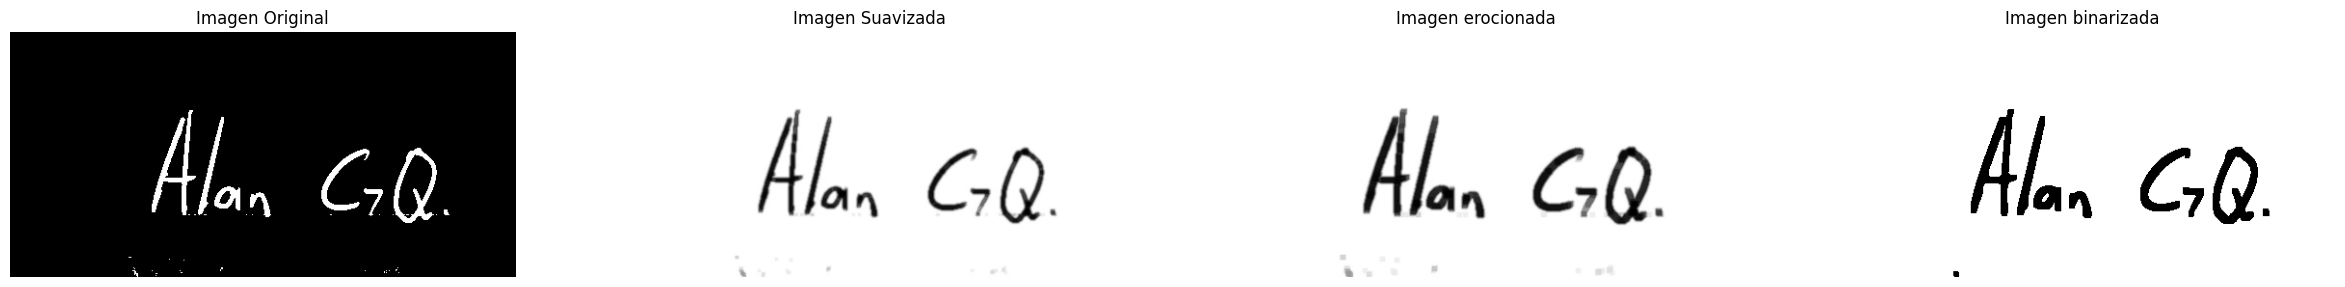

<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 

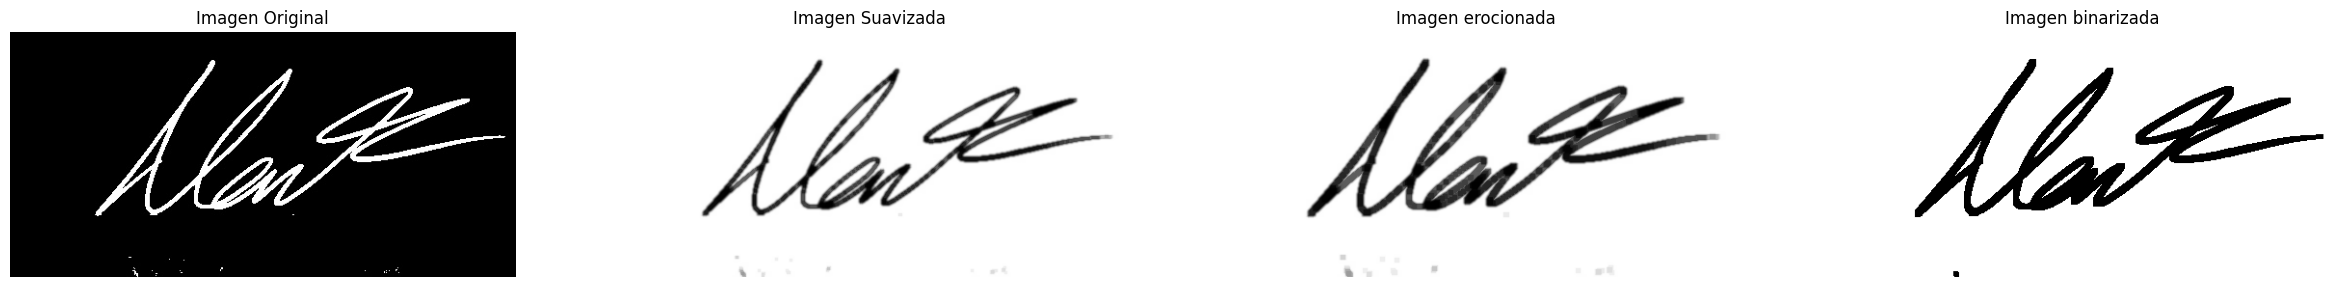

<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 

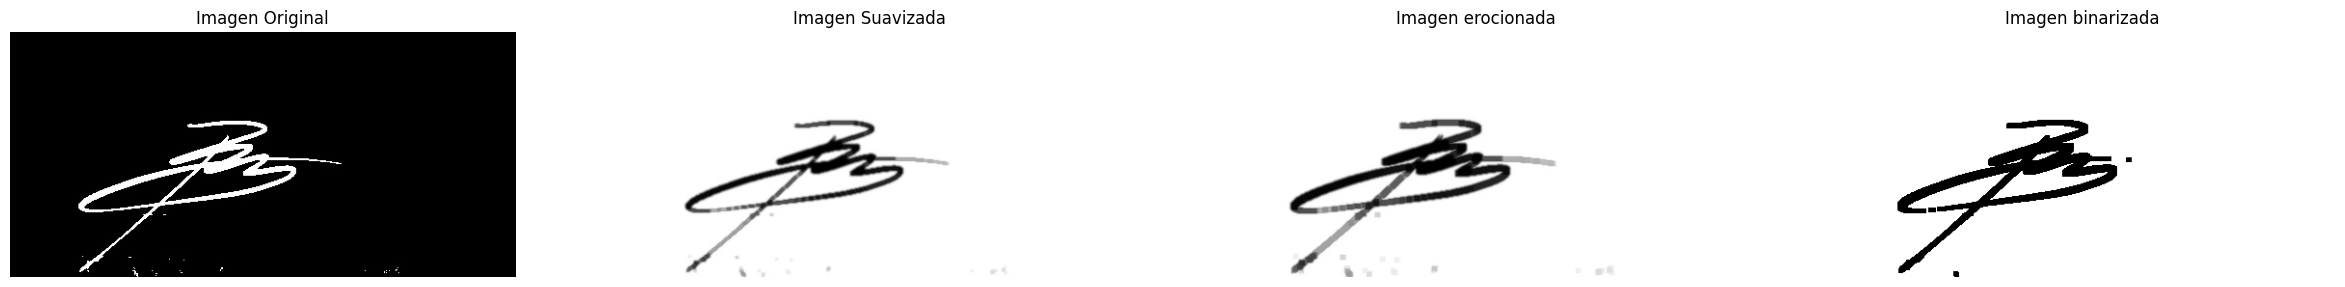

Proceso completado


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

signatures_dictionary = {}
signatures_dictionary["imageName"] = 000


def eliminar_ruido(ruta_firma):
    # Cargar la imagen en escala de grises
    imagen = cv2.imread(ruta_firma, 0)


    if imagen is None:
        print(f"Error: No se pudo cargar la imagen {ruta_firma}.")
        return

    kernel = np.ones((3,3), np.uint8)

    # Aplicar filtro Gaussiano
    imagen_suavizada = cv2.GaussianBlur(imagen, (5, 5), 0)
    imagen_suavizada = cv2.morphologyEx(imagen_suavizada, cv2.MORPH_OPEN, kernel)
    imagen_suavizada = 255 - imagen_suavizada # Pasa la imagen de la firma 

    erosion = cv2.erode(imagen_suavizada, kernel, iterations=1)

    _, img_binaria = cv2.threshold(erosion, 170, 255, cv2.THRESH_BINARY)


    #erosion = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    
    '''
    erosion[erosion == 0] = 255
    erosion[erosion != 255] = 0

    erosion = 1 - erosion # Asi el 0 representa al blanco y el 1 al negro
    '''

    print(type(img_binaria))

    arreglo_bin = np.where(img_binaria == 255, 0, 1)

    with np.printoptions(threshold=np.inf):
        print(arreglo_bin)

    print(erosion.sum()) # Sumatoria de todos lo 1 del arreglo (es decir cada pixel iluminado (en negro))


    # Mostrar resultados de erosionar la imgen 
    plt.figure(figsize=(30, 10))
    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original'), plt.axis('off')
    plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(imagen_suavizada, cv2.COLOR_BGR2RGB)), plt.title('Imagen Suavizada'), plt.axis('off')
    plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)), plt.title('Imagen erocionada'), plt.axis('off')
    plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(img_binaria, cv2.COLOR_BGR2RGB)), plt.title('Imagen binarizada'), plt.axis('off')
    plt.show()
'''
'''


ruta_carpeta_firmas = "firmas"
carpeta_patrones = "Extraccion_patrones"

os.makedirs(carpeta_patrones, exist_ok=True)

'''
for archivo in os.listdir(ruta_carpeta_firmas):
    if (archivo.startswith("mascara_Cheques_") & archivo.endswith((".jpg", ".jpeg", ".png"))):
        ruta_firma = os.path.join(ruta_carpeta_firmas, archivo)
        eliminar_ruido(ruta_firma)
        # patron_real(ruta_firma)

'''
# Solo agarramos 3 imagenes para la prueba

# Obtener todos los archivos de la carpeta de firmas
archivos_firmas = [archivo for archivo in os.listdir(ruta_carpeta_firmas) if archivo.startswith("mascara_Cheques_") and archivo.endswith((".jpg", ".jpeg", ".png"))]

# Seleccionar aleatoriamente 3 archivos de la lista
imagenes_aleatorias = random.sample(archivos_firmas, min(3, len(archivos_firmas)))

# Procesar las imágenes seleccionadas
for archivo in imagenes_aleatorias:
   ruta_firma = os.path.join(ruta_carpeta_firmas, archivo)
   eliminar_ruido(ruta_firma)
#'''

print("Proceso completado")
